## Cross Section Plotting

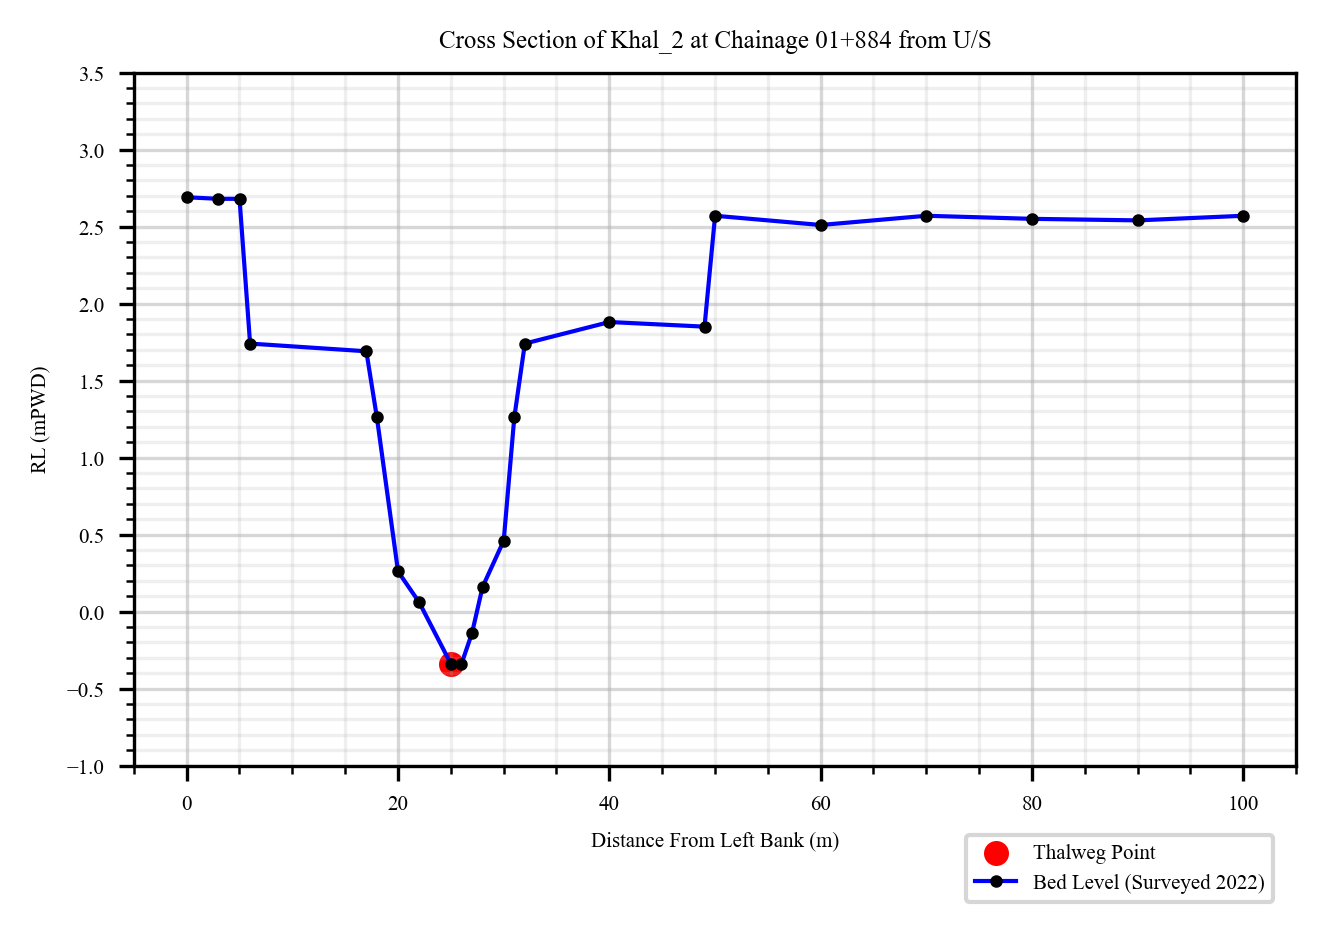

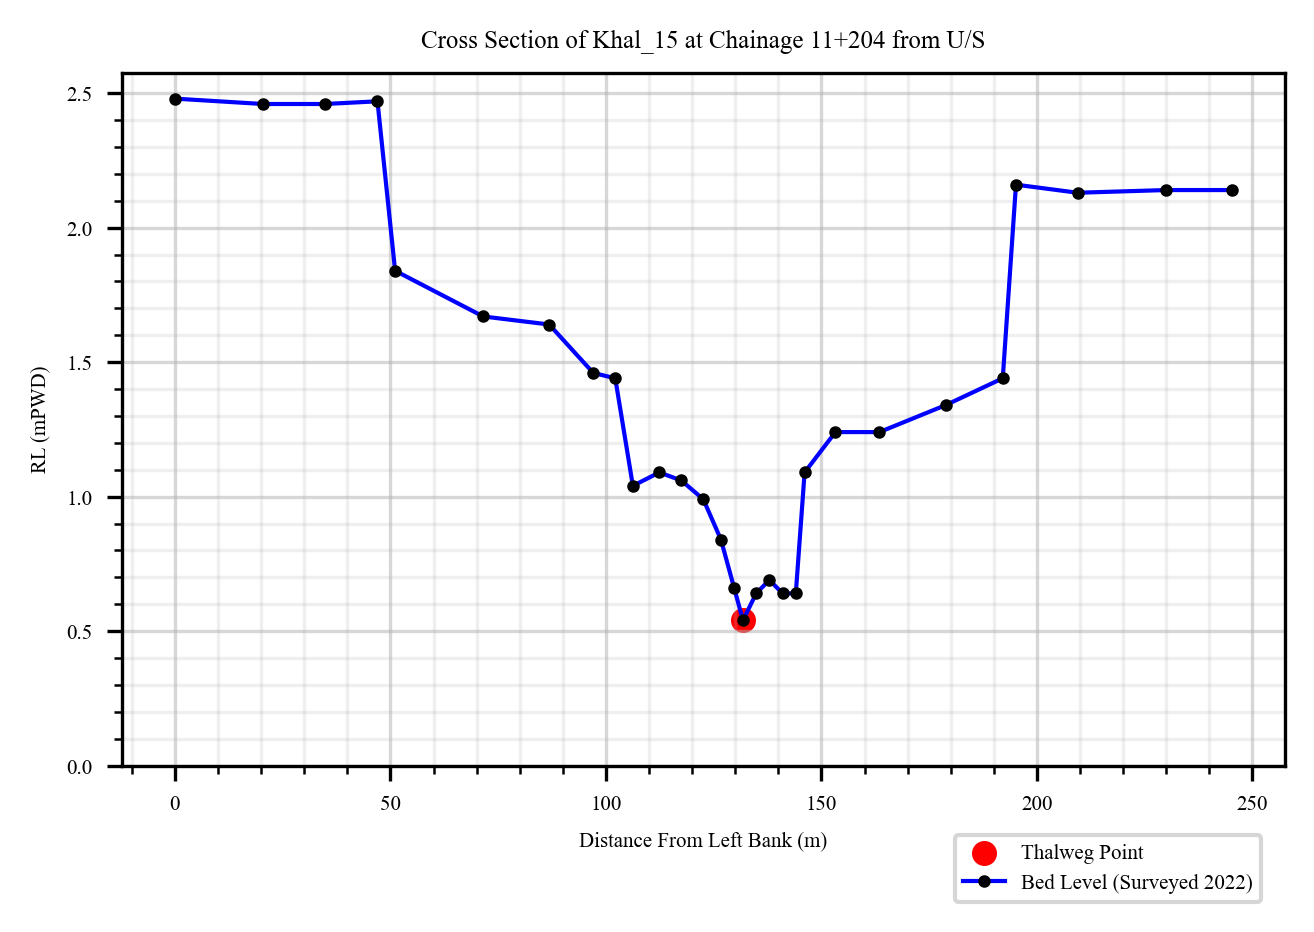

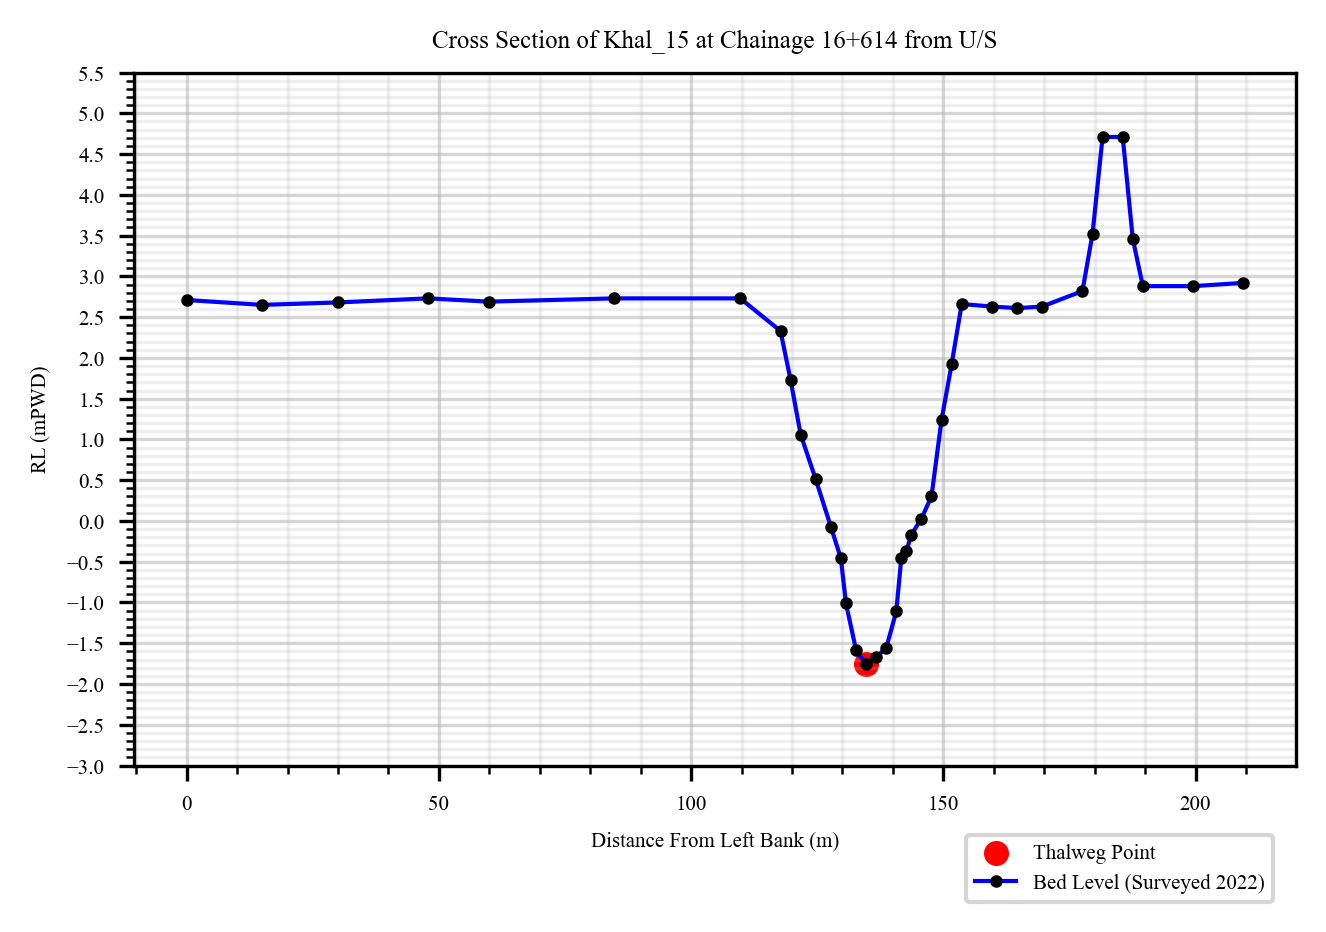

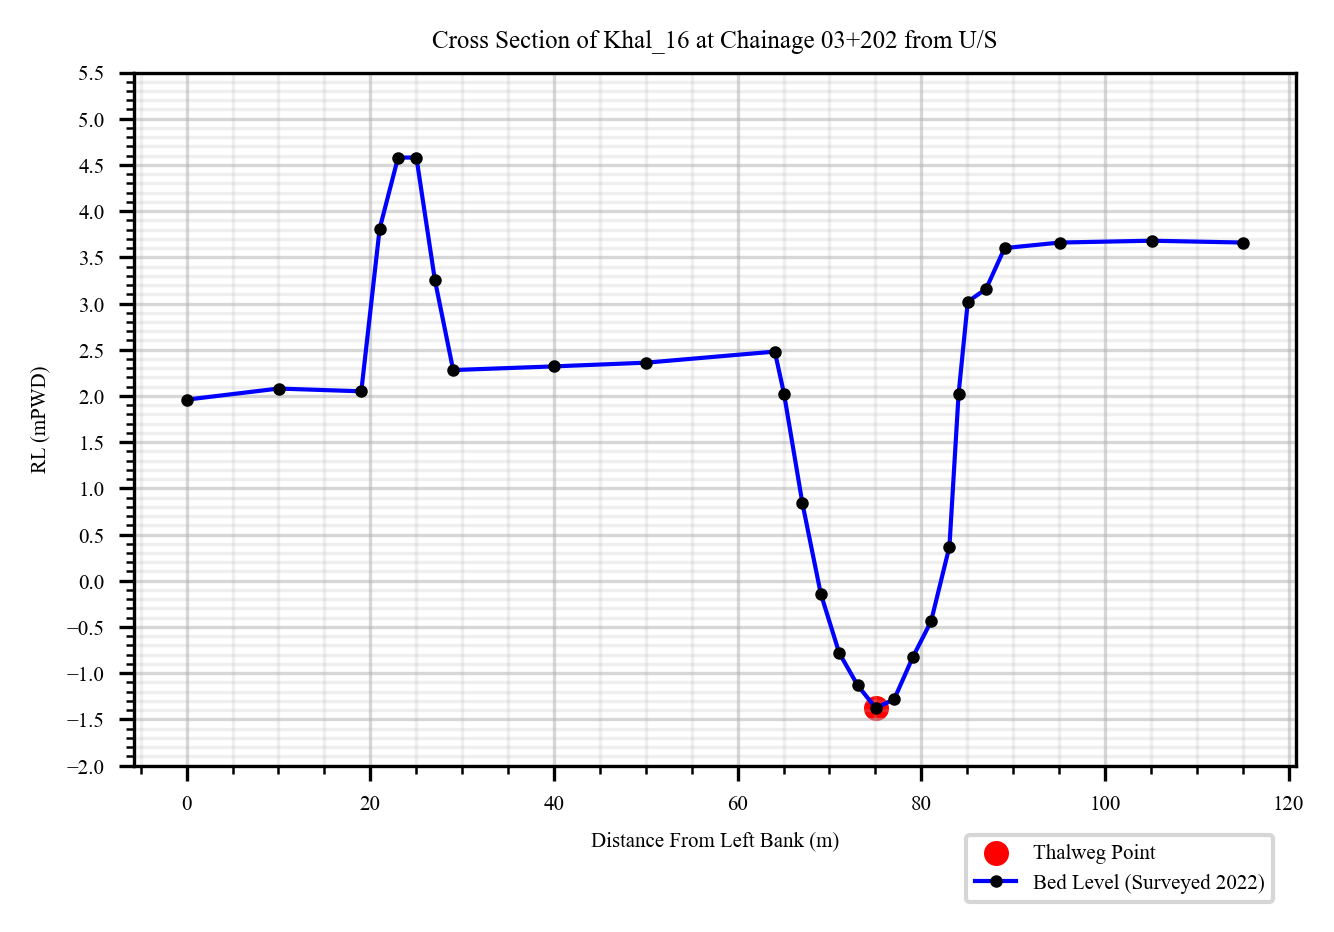

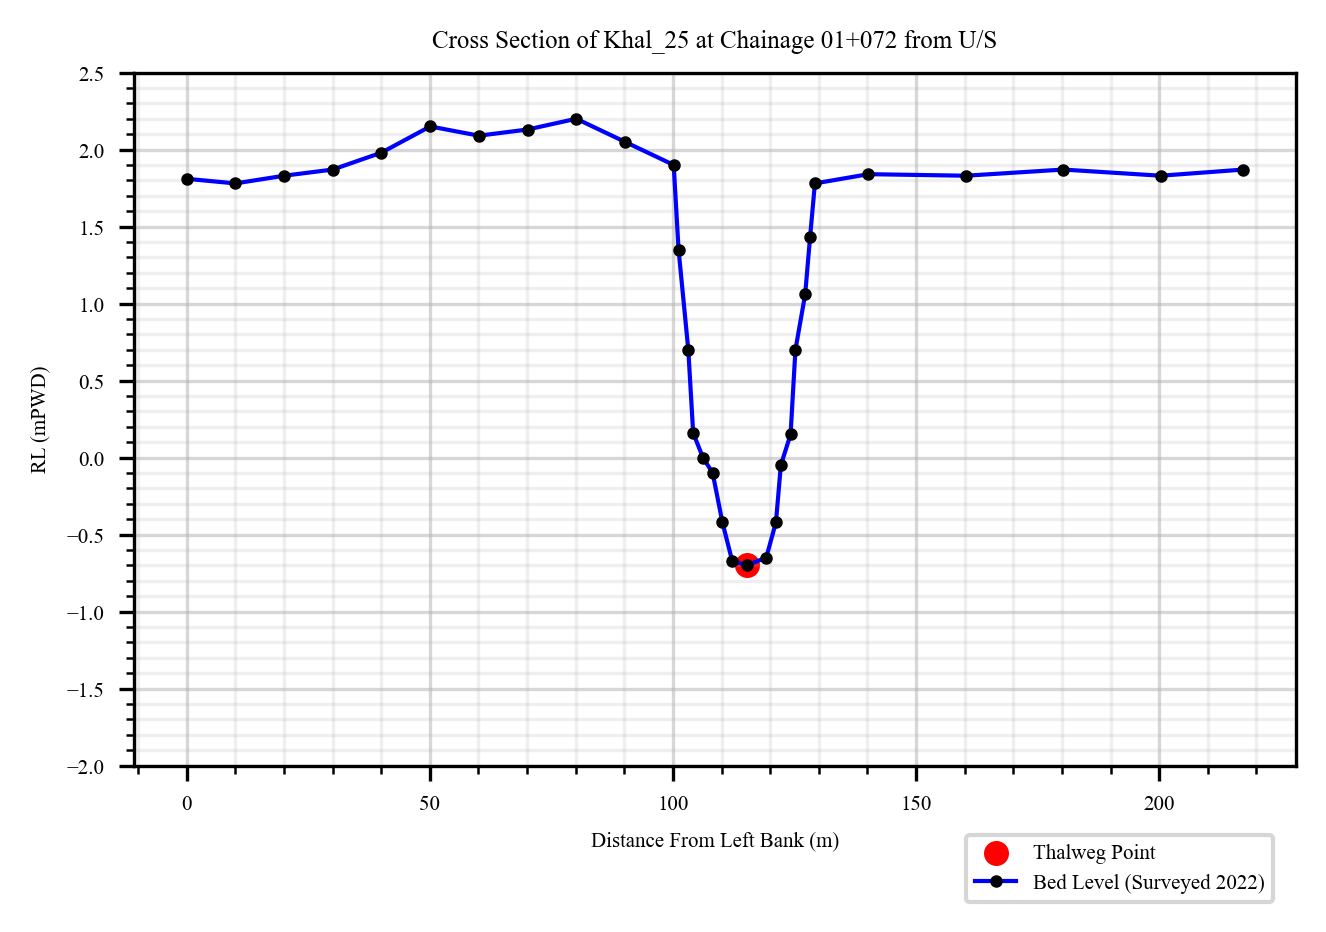

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# Defining a function to convert the number to conventional chainage format
def chainage_format(num):
    q = str(int(num))
    if len(q) == 1:
        return '00+00{}'.format(q)
    elif len(q) == 2:
        return '00+0{}'.format(q)
    elif len(q) == 3:
        return '00+{}'.format(q)
    elif len(q) == 4:
        return '0{}+{}'.format(q[0],q[1:])
    else:
        return '{c}+{d}{e}{f}'.format(c = q[:-3],d = q[-3],e = q[-2],f = q[-1])

# Reading the cross-section points excel file
df = pd.read_excel(r"E:\Script\Kutubdia_Khal_Cross_Section_Plotting\Data\Data_for_Khal_Cross_Section_Plotting.xlsx")


# Setting the name of khal and chainage field in the file
khal_unique_field = 'HD_Khal'
sec_unique_field = 'HD_Chainage'

# Defiining a dataframe to store the lowest point of each cross-section
r_df = pd.DataFrame()

# Iterating through the individual khal
for khal in df[khal_unique_field].unique():
    gr2 = df.groupby(khal_unique_field)
    df2 = gr2.get_group(khal)
    
    # Ierating through each cross-section for plotting
    for x in df2[sec_unique_field].unique():
        gr = df2.groupby(sec_unique_field)
        n_df = gr.get_group(x)
        
        # Converting the number to the chainage format using 'chainage_format' function
        chainage_txt = chainage_format(x)
    
        # Finding the lowest (thalweg) point for the particular cross section and updating it in the thalweg dataframe (r_df)
        m_df = n_df.nsmallest(1, 'RL_mPWD')
        r_df = pd.concat([r_df,m_df])
        
        # Setting the plot font family, weight and height by defining a dictionary
        font={'family':'Times New Roman',
         'weight':'normal',
         'size':5}

        plt.rc('font',**font)
        plt.rc('xtick',labelsize=5)
        plt.rc('ytick',labelsize=5)

        plt.figure(figsize=(5,3), dpi=300)

        plt.scatter(m_df['Dist_Gen'], m_df['RL_mPWD'],marker='o',s=25, c='red',edgecolor='red', alpha=1, label='Thalweg Point')

        plt.plot(n_df['Dist_Gen'], n_df['RL_mPWD'],lw=1,color='blue',marker='o',markersize=2,markerfacecolor='black',
                 markeredgecolor='black',label='Bed Level (Surveyed 2022)')

        plt.minorticks_on()
        plt.grid(alpha=0.5)
        plt.grid(which='minor',alpha=0.2)
        low,high=round(n_df['RL_mPWD'].min())-1,round(n_df['RL_mPWD'].max())+1
        plt.legend(bbox_to_anchor=(0.98, -0.1), loc=1, borderaxespad=0)
        #plt.legend(loc=9)
        plt.yticks(np.arange(low,high,0.5))
        plot_title = 'Cross Section of {a} at Chainage {b} from U/S'.format(a=khal, b=chainage_txt)
        plt.title(plot_title)
        plt.xlabel('Distance From Left Bank (m)')
        plt.ylabel('RL (mPWD)')
        
        # Saving the plotted cross-section figure
        plt.savefig(r"E:\Script\Kutubdia_Khal_Cross_Section_Plotting\Output\Cross Section\{}_CH_{}.jpg".format(khal,x), 
                    bbox_inches='tight', dpi = 300)

